In [1]:
import gymnasium as gym
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
from gym.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

runtime = 0.03 seconds


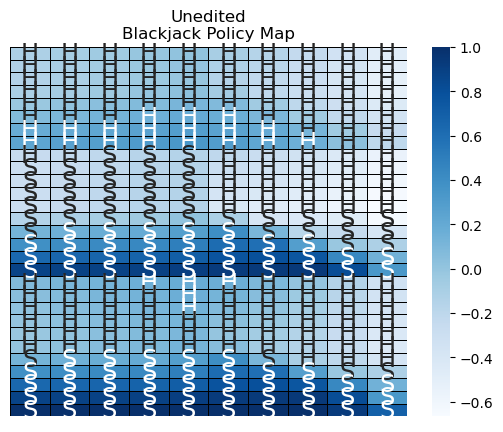

In [6]:
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)
# run VI
#run VI
V, V_track, pi = Planner(blackjack.P).value_iteration()

#create actions dictionary and set map size
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)

#get formatted state values and policy map
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)

#plot policy map
title="Unedited\nBlackjack Policy Map"
Plots.plot_policy(val_max, policy_map, blackjack_map_size, title)

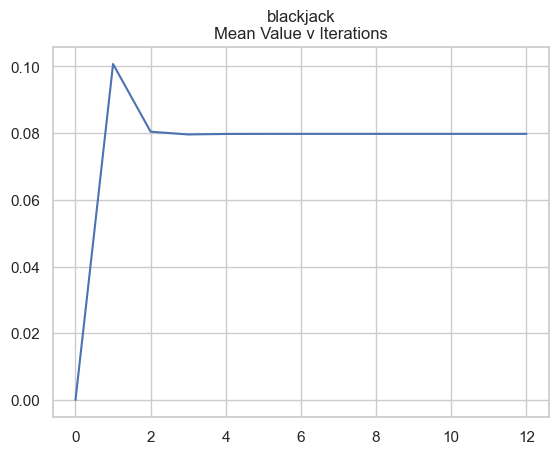

In [7]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "blackjack\nMean Value v Iterations")

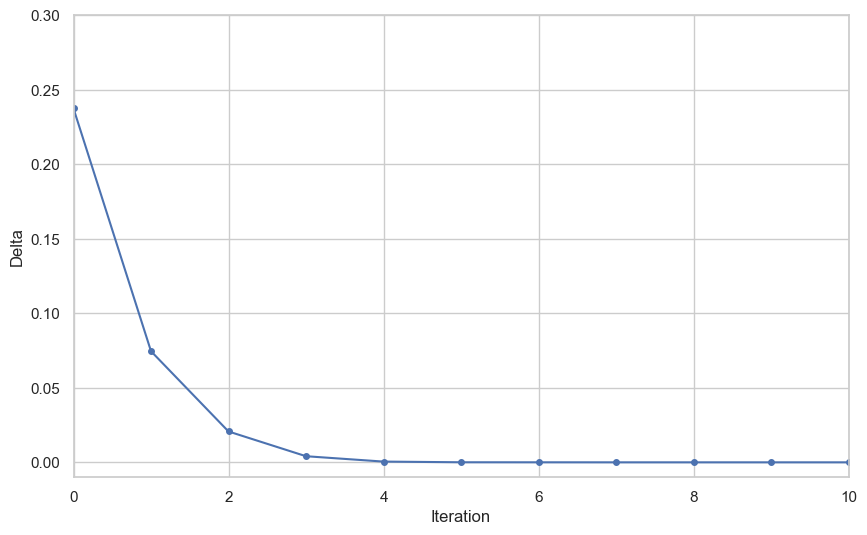

In [14]:
delta = np.diff(V_track, axis=0)
value_differences_abs = np.abs(delta)
mean_value_differences_abs = np.mean(value_differences_abs, axis=1)


# Plotting the mean absolute value function difference vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(mean_value_differences_abs, marker='o', linestyle='-', markersize=4)
# plt.title('Mean Absolute Difference in Value Function vs. Iterations')
plt.xlabel('Iteration')
plt.xlim(0,10)
plt.ylim(-0.01,0.3)
plt.ylabel('Delta')
plt.grid(True)
plt.show()

runtime = 0.06 seconds


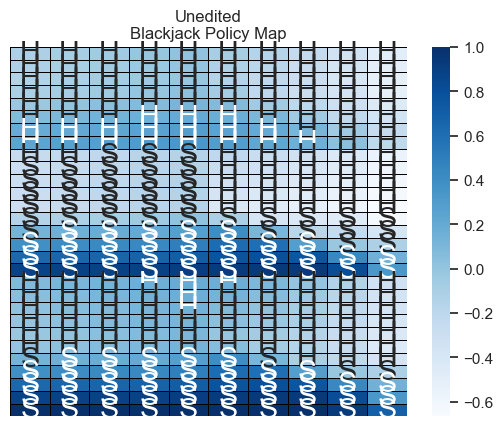

In [15]:
V, V_track, pi = Planner(blackjack.P).policy_iteration()

#create actions dictionary and set map size
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)

#get formatted state values and policy map
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)

#plot policy map
title="Unedited\nBlackjack Policy Map"
Plots.plot_policy(val_max, policy_map, blackjack_map_size, title)

In [22]:
test_scores = TestEnv.test_env(env=blackjack, n_iters=50, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))

0.0


In [23]:
test_scores

array([-1.,  1., -1., -1.,  1.,  0., -1., -1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1., -1.,  0.,  1.,  1.,  0., -1.,  1.,  1., -1.,  0.,  1.,
       -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.])

In [24]:
len(test_scores)

50

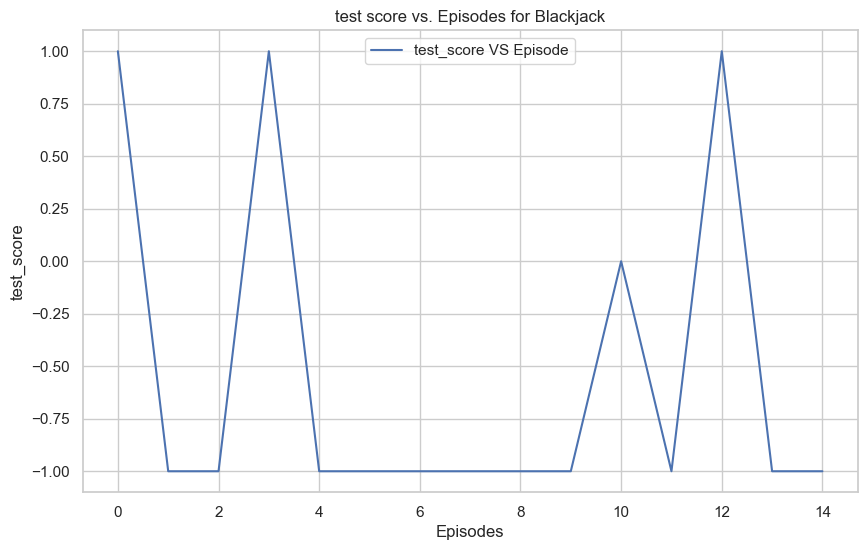

In [77]:
num_episodes = 15

rewards = []
total =[]
rewards_sum=[]
for episode in range(num_episodes):
    test_scores = TestEnv.test_env(env=blackjack, n_iters=episode+1, render=False, pi=pi, user_input=False)
    average_score=np.mean(test_scores)
    rewards.append(average_score)
    array_sum = np.sum(test_scores)
    rewards_sum.append(array_sum)

plt.figure(figsize=(10, 6))
plt.plot(test_scores, label='test_score VS Episode')
plt.xlabel('Episodes')
plt.ylabel('test_score')
plt.title('test score vs. Episodes for Blackjack')
plt.legend()
plt.show()






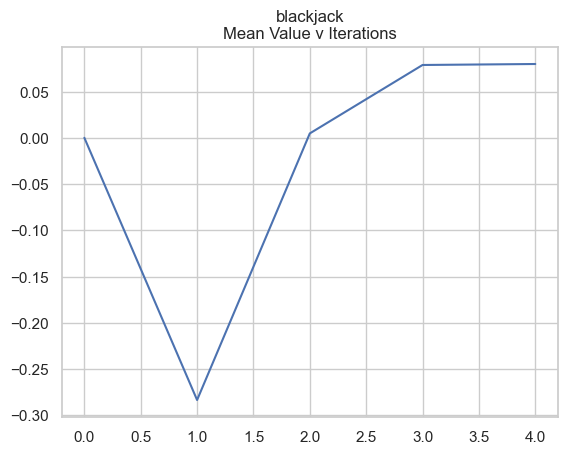

In [78]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "blackjack\nMean Value v Iterations")

In [79]:
# above is for policy iteration

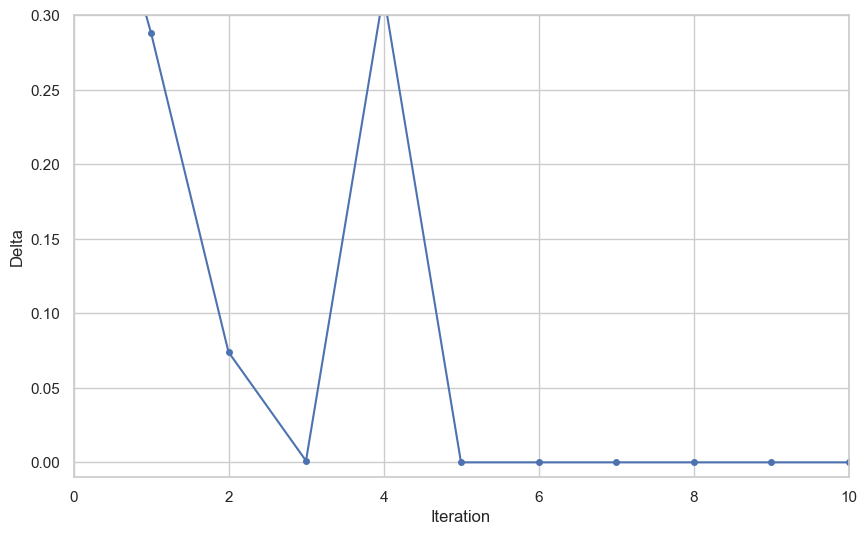

In [80]:
delta = np.diff(V_track, axis=0)
value_differences_abs = np.abs(delta)
mean_value_differences_abs = np.mean(value_differences_abs, axis=1)


# Plotting the mean absolute value function difference vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(mean_value_differences_abs, marker='o', linestyle='-', markersize=4)
# plt.title('Mean Absolute Difference in Value Function vs. Iterations')
plt.xlabel('Iteration')
plt.xlim(0,10)
plt.ylim(-0.01,0.3)
plt.ylabel('Delta')
plt.grid(True)
plt.show()

In [82]:
import gymnasium as gym
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.utils.grid_search import GridSearch
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
from bettermdptools.algorithms.rl import RL
from bettermdptools.algorithms.planner import Planner

import itertools
from itertools import product, combinations

In [83]:
# def q_learning_grid_search(env, gamma, epsilon_decay, iters):
gamma=[.9]
epsilon_decay = [.9]
iters = [15000]
for i in itertools.product(gamma, epsilon_decay, iters):
    print("running q_learning with gamma:", i[0],  "epsilon decay:", i[1],  " iterations:", i[2])
    Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=i[0], init_alpha=0.8, epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=100, pi=pi)
    print("Avg. episode reward: ", np.mean(episode_rewards))

running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 15000


runtime = 1.76 seconds
Avg. episode reward:  -0.11


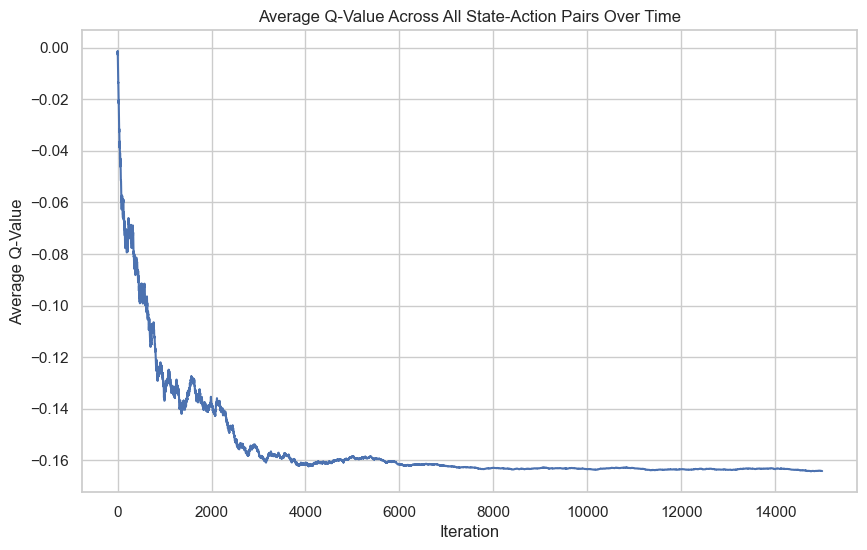

In [84]:
average_q_values = np.mean(Q_track, axis=(1, 2))

plt.figure(figsize=(10, 6))
plt.plot(average_q_values)
plt.title('Average Q-Value Across All State-Action Pairs Over Time')
plt.xlabel('Iteration')
plt.ylabel('Average Q-Value')
plt.show()

In [85]:
# def q_learning_grid_search(env, gamma, epsilon_decay, iters):
gamma=[.9]
epsilon_decay = [.9]
iters = [15000]
for i in itertools.product(gamma, epsilon_decay, iters):
    print("running q_learning with gamma:", i[0],  "epsilon decay:", i[1],  " iterations:", i[2])
    Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=i[0], init_alpha=0.5, epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=100, pi=pi)
    print("Avg. episode reward: ", np.mean(episode_rewards))

running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 15000


runtime = 1.60 seconds
Avg. episode reward:  0.07


In [87]:
# def q_learning_grid_search(env, gamma, epsilon_decay, iters):
gamma=[.9]
epsilon_decay = [.9]
iters = [15000]
for i in itertools.product(gamma, epsilon_decay, iters):
    print("running q_learning with gamma:", i[0],  "epsilon decay:", i[1],  " iterations:", i[2])
    Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=i[0], init_alpha=0.3, epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=1000, pi=pi)
    print("Avg. episode reward: ", np.mean(episode_rewards))

running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 15000


runtime = 1.59 seconds
Avg. episode reward:  -0.034


In [88]:
# def q_learning_grid_search(env, gamma, epsilon_decay, iters):
gamma=[.9]
epsilon_decay = [.9]
iters = [15000]
for i in itertools.product(gamma, epsilon_decay, iters):
    print("running q_learning with gamma:", i[0],  "epsilon decay:", i[1],  " iterations:", i[2])
    Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=i[0], init_alpha=0.3, epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=2000, pi=pi)
    print("Avg. episode reward: ", np.mean(episode_rewards))

running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 15000


runtime = 1.61 seconds
Avg. episode reward:  -0.0085


In [89]:
# def q_learning_grid_search(env, gamma, epsilon_decay, iters):
gamma=[.9]
epsilon_decay = [.9]
iters = [15000]
for i in itertools.product(gamma, epsilon_decay, iters):
    print("running q_learning with gamma:", i[0],  "epsilon decay:", i[1],  " iterations:", i[2])
    Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=i[0], init_alpha=0.3, epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=3000, pi=pi)
    print("Avg. episode reward: ", np.mean(episode_rewards))

running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 15000


runtime = 1.58 seconds
Avg. episode reward:  -0.069


In [90]:
# def q_learning_grid_search(env, gamma, epsilon_decay, iters):
gamma=[.9]
epsilon_decay = [.9]
iters = [15000]
for i in itertools.product(gamma, epsilon_decay, iters):
    print("running q_learning with gamma:", i[0],  "epsilon decay:", i[1],  " iterations:", i[2])
    Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=i[0], init_alpha=0.3, epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=4000, pi=pi)
    print("Avg. episode reward: ", np.mean(episode_rewards))

running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 15000


runtime = 1.60 seconds
Avg. episode reward:  -0.06275


In [91]:
# def q_learning_grid_search(env, gamma, epsilon_decay, iters):
gamma=[.9]
epsilon_decay = [.9]
iters = [15000]
for i in itertools.product(gamma, epsilon_decay, iters):
    print("running q_learning with gamma:", i[0],  "epsilon decay:", i[1],  " iterations:", i[2])
    Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=i[0], init_alpha=0.3, epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=5000, pi=pi)
    print("Avg. episode reward: ", np.mean(episode_rewards))

running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 15000


runtime = 1.65 seconds
Avg. episode reward:  -0.048


In [92]:
# def q_learning_grid_search(env, gamma, epsilon_decay, iters):
gamma=[.9]
epsilon_decay = [.9]
iters = [15000]
for i in itertools.product(gamma, epsilon_decay, iters):
    print("running q_learning with gamma:", i[0],  "epsilon decay:", i[1],  " iterations:", i[2])
    Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=i[0], init_alpha=0.3, epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=6000, pi=pi)
    print("Avg. episode reward: ", np.mean(episode_rewards))

running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 15000


runtime = 1.59 seconds
Avg. episode reward:  -0.06916666666666667


In [93]:
# def q_learning_grid_search(env, gamma, epsilon_decay, iters):
gamma=[.9]
epsilon_decay = [.9]
iters = [15000]
for i in itertools.product(gamma, epsilon_decay, iters):
    print("running q_learning with gamma:", i[0],  "epsilon decay:", i[1],  " iterations:", i[2])
    Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=i[0], init_alpha=0.3, epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=7000, pi=pi)
    print("Avg. episode reward: ", np.mean(episode_rewards))

running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 15000


runtime = 1.60 seconds
Avg. episode reward:  -0.07628571428571429


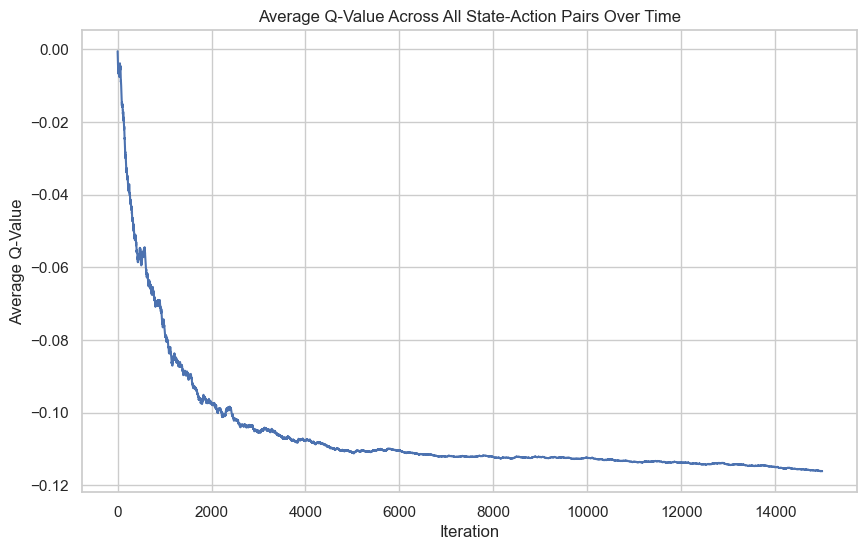

In [94]:
average_q_values = np.mean(Q_track, axis=(1, 2))

plt.figure(figsize=(10, 6))
plt.plot(average_q_values)
plt.title('Average Q-Value Across All State-Action Pairs Over Time')
plt.xlabel('Iteration')
plt.ylabel('Average Q-Value')
plt.show()

In [95]:
# def q_learning_grid_search(env, gamma, epsilon_decay, iters):
gamma=[1]
epsilon_decay = [.9]
iters = [15000]
for i in itertools.product(gamma, epsilon_decay, iters):
    print("running q_learning with gamma:", i[0],  "epsilon decay:", i[1],  " iterations:", i[2])
    Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=i[0], init_alpha=0.8, epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=100, pi=pi)
    print("Avg. episode reward: ", np.mean(episode_rewards))

running q_learning with gamma: 1 epsilon decay: 0.9  iterations: 15000


runtime = 1.63 seconds
Avg. episode reward:  -0.03


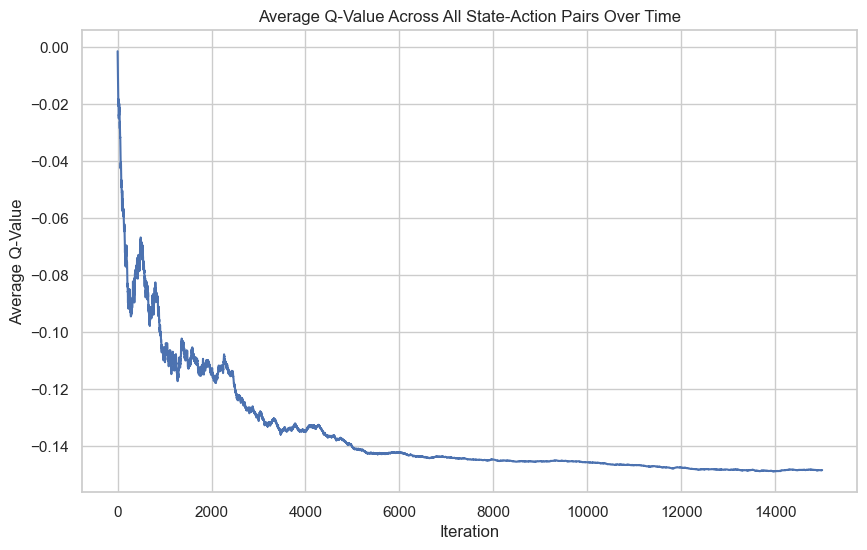

In [96]:
average_q_values = np.mean(Q_track, axis=(1, 2))

plt.figure(figsize=(10, 6))
plt.plot(average_q_values)
plt.title('Average Q-Value Across All State-Action Pairs Over Time')
plt.xlabel('Iteration')
plt.ylabel('Average Q-Value')
plt.show()